In [25]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *
from test_utils import summary, comparator

%matplotlib inline
np.random.seed(1)

In [26]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


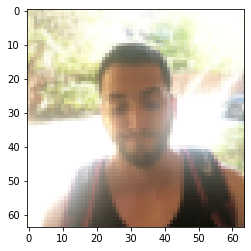

In [27]:
index = 124
plt.imshow(X_train_orig[index])
plt.show()

In [6]:
def happyModel():
    """
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code all the values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    None

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """
    model = tf.keras.Sequential([
            
            tf.keras.layers.ZeroPadding2D(padding = (3,3),input_shape = (64,64,3)),
            
            tf.keras.layers.Conv2D(filters = 32,kernel_size = (7,7),strides = 1),
            
            tf.keras.layers.BatchNormalization(axis = 3),
           
            tf.keras.layers.ReLU(),
            
            tf.keras.layers.MaxPool2D(),
            
            tf.keras.layers.Flatten(),
            
            tf.keras.layers.Dense(units = 1,activation = 'sigmoid')])
    
    return model

In [7]:
happy_model = happyModel()
# Print a summary for each layer
for layer in summary(happy_model):
    print(layer)
    
output = [['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))],
            ['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform'],
            ['BatchNormalization', (None, 64, 64, 32), 128],
            ['ReLU', (None, 64, 64, 32), 0],
            ['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid'],
            ['Flatten', (None, 32768), 0],
            ['Dense', (None, 1), 32769, 'sigmoid']]
    
comparator(summary(happy_model), output)

['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))]
['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform']
['BatchNormalization', (None, 64, 64, 32), 128]
['ReLU', (None, 64, 64, 32), 0]
['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid']
['Flatten', (None, 32768), 0]
['Dense', (None, 1), 32769, 'sigmoid']
All tests passed!


In [8]:
happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [9]:
happy_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 70, 70, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 32)        4736      
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 32)        128       
_________________________________________________________________
re_lu (ReLU)                 (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3

In [10]:
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 4s 108ms/step - loss: 0.8516 - accuracy: 0.7567
Epoch 2/10
38/38 [==============================] - 4s 103ms/step - loss: 0.3024 - accuracy: 0.8750
Epoch 3/10
38/38 [==============================] - 4s 103ms/step - loss: 0.2353 - accuracy: 0.91830s - loss: 0.2308 - accuracy
Epoch 4/10
38/38 [==============================] - 4s 103ms/step - loss: 0.1148 - accuracy: 0.9483
Epoch 5/10
38/38 [==============================] - 4s 100ms/step - loss: 0.1114 - accuracy: 0.9583
Epoch 6/10
38/38 [==============================] - 4s 95ms/step - loss: 0.0845 - accuracy: 0.9767
Epoch 7/10
38/38 [==============================] - 4s 97ms/step - loss: 0.0890 - accuracy: 0.9667
Epoch 8/10
38/38 [==============================] - 4s 97ms/step - loss: 0.0684 - accuracy: 0.9767
Epoch 9/10
38/38 [==============================] - 4s 95ms/step - loss: 0.0732 - accuracy: 0.9767
Epoch 10/10
38/38 [==============================] - 4s 97ms/step - loss: 0.

In [11]:
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 26ms/step - loss: 0.2049 - accuracy: 0.8933


[0.20485074818134308, 0.8933333158493042]

In [ ]:
# Signs dataset

In [28]:
# Loading the data (signs)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

y = 4


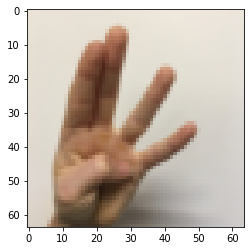

In [13]:
# Example of an image from the dataset
index = 9
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [14]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [19]:
def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code some values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """

    input_img = tf.keras.Input(shape=input_shape)

    x = tf.keras.layers.Conv2D(filters = 8,kernel_size = (4,4),strides = (1,1),padding = 'same')(input_img)

    x = tf.keras.layers.ReLU()(x)
    
    x = tf.keras.layers.MaxPool2D(pool_size = (8,8),strides = (8,8),padding = 'same')(x)
    
    x = tf.keras.layers.Conv2D(filters = 16,kernel_size = (2,2),strides = (1,1),padding = 'same')(x)
    
    x = tf.keras.layers.ReLU()(x)

    x = tf.keras.layers.MaxPool2D(pool_size = (4,4),strides = (4,4),padding = 'same')(x)
    
    x = tf.keras.layers.Flatten()(x)
    
    outputs = tf.keras.layers.Dense(6,activation = 'softmax')(x)

    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    
    return model

In [20]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()
    
output = [['InputLayer', [(None, 64, 64, 3)], 0],
        ['Conv2D', (None, 64, 64, 8), 392, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 64, 64, 8), 0],
        ['MaxPooling2D', (None, 8, 8, 8), 0, (8, 8), (8, 8), 'same'],
        ['Conv2D', (None, 8, 8, 16), 528, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 8, 8, 16), 0],
        ['MaxPooling2D', (None, 2, 2, 16), 0, (4, 4), (4, 4), 'same'],
        ['Flatten', (None, 64), 0],
        ['Dense', (None, 6), 390, 'softmax']]
    
comparator(summary(conv_model), output)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 8)         392       
_________________________________________________________________
re_lu_5 (ReLU)               (None, 64, 64, 8)         0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 16)          528       
_________________________________________________________________
re_lu_6 (ReLU)               (None, 8, 8, 16)          0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 2, 2, 16)         

In [21]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
17/17 [==============================] - 2s 107ms/step - loss: 1.8500 - accuracy: 0.1565 - val_loss: 1.7877 - val_accuracy: 0.2000
Epoch 2/100
17/17 [==============================] - 2s 106ms/step - loss: 1.7859 - accuracy: 0.2102 - val_loss: 1.7840 - val_accuracy: 0.1667
Epoch 3/100
17/17 [==============================] - 2s 106ms/step - loss: 1.7782 - accuracy: 0.2361 - val_loss: 1.7767 - val_accuracy: 0.2167
Epoch 4/100
17/17 [==============================] - 2s 106ms/step - loss: 1.7712 - accuracy: 0.2333 - val_loss: 1.7696 - val_accuracy: 0.2917
Epoch 5/100
17/17 [==============================] - 2s 106ms/step - loss: 1.7638 - accuracy: 0.2981 - val_loss: 1.7611 - val_accuracy: 0.2917
Epoch 6/100
17/17 [==============================] - 2s 106ms/step - loss: 1.7537 - accuracy: 0.3306 - val_loss: 1.7506 - val_accuracy: 0.3333
Epoch 7/100
17/17 [==============================] - 2s 106ms/step - loss: 1.7411 - accuracy: 0.3731 - val_loss: 1.7374 - val_accuracy: 0.3667

In [22]:
history.history

{'loss': [1.8499544858932495,
  1.7858672142028809,
  1.778210997581482,
  1.7711704969406128,
  1.7637970447540283,
  1.7537330389022827,
  1.7410792112350464,
  1.7264970541000366,
  1.7080421447753906,
  1.6859592199325562,
  1.6594856977462769,
  1.6274784803390503,
  1.5859363079071045,
  1.537363886833191,
  1.4855122566223145,
  1.4317268133163452,
  1.3785566091537476,
  1.326280951499939,
  1.2770464420318604,
  1.2297857999801636,
  1.1865208148956299,
  1.1465399265289307,
  1.110511064529419,
  1.0767722129821777,
  1.0471124649047852,
  1.0198585987091064,
  0.9905669093132019,
  0.966506838798523,
  0.9447748064994812,
  0.9230697751045227,
  0.9017552733421326,
  0.8827999830245972,
  0.8643985986709595,
  0.84629887342453,
  0.8313941955566406,
  0.8149963021278381,
  0.8009505271911621,
  0.7864001989364624,
  0.7727891206741333,
  0.7606337070465088,
  0.7470831871032715,
  0.7357438206672668,
  0.7249459028244019,
  0.713714063167572,
  0.7036530375480652,
  0.693318

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epoch')]

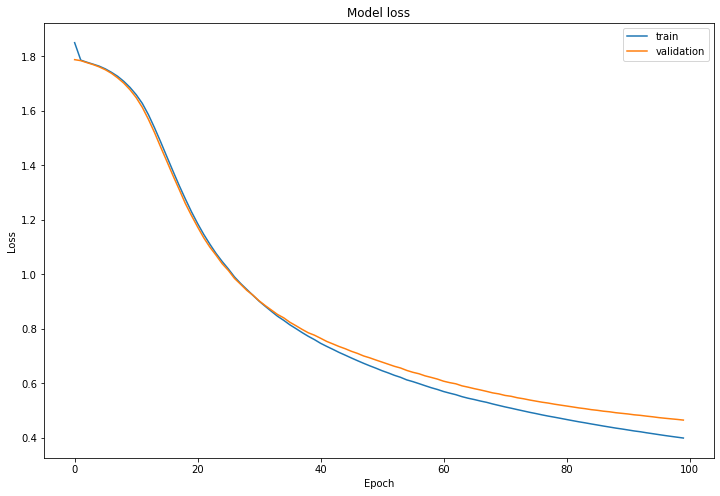

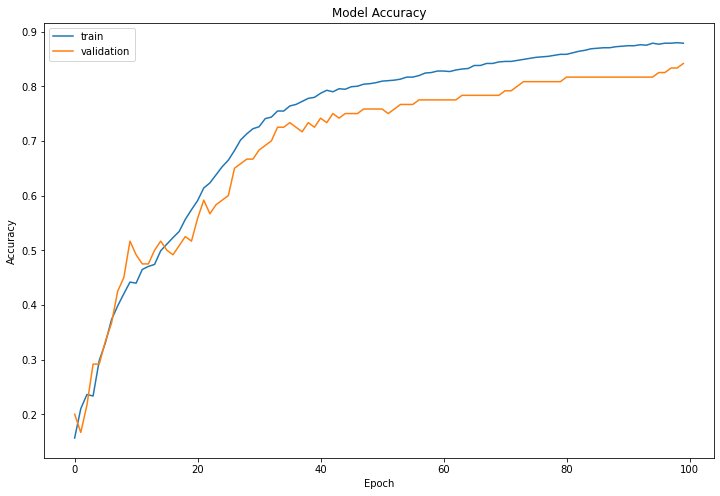

In [23]:
# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on. 
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')